<a href="https://colab.research.google.com/github/sambhe/Eve/blob/master/vijay_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install GPy

In [0]:
import GPy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal




In [0]:
ker1 = GPy.kern.RBF(1)  # Equivalent to ker1 = GPy.kern.rbf(input_dim=1, variance=1., lengthscale=1.)
ker2 = GPy.kern.RBF(input_dim=1, variance = .75, lengthscale=2.)
ker3 = GPy.kern.RBF(1, .5, .5)

In [0]:
print (ker2)

  rbf.         |  value  |  constraints  |  priors
  variance     |   0.75  |      +ve      |        
  lengthscale  |    2.0  |      +ve      |        


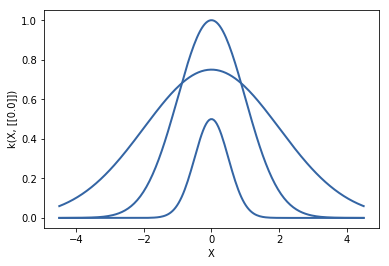

In [0]:
_ = ker1.plot(ax=plt.gca())
_ = ker2.plot(ax=plt.gca())
_ = ker3.plot(ax=plt.gca())

 /usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


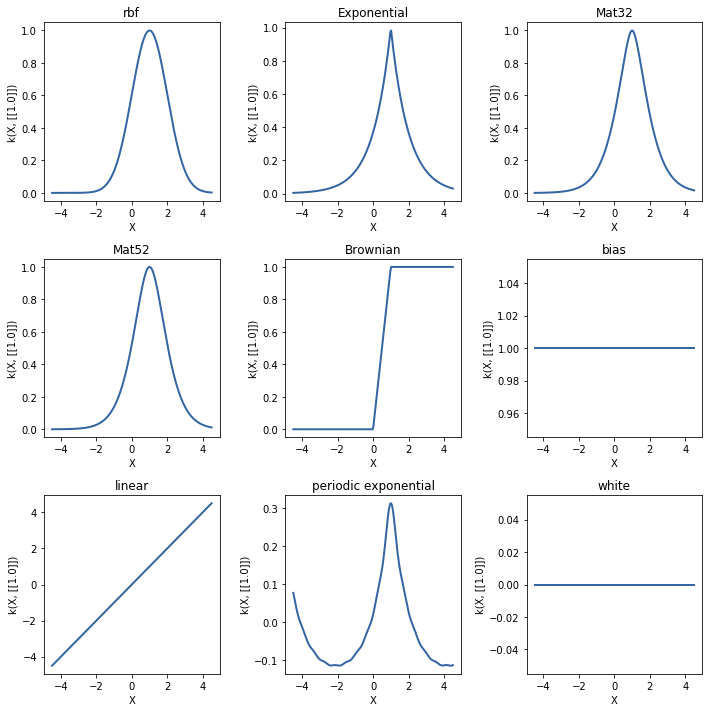

In [0]:
figure, axes = plt.subplots(3,3, figsize=(10,10), tight_layout=True)
kerns = [GPy.kern.RBF(1), GPy.kern.Exponential(1), GPy.kern.Matern32(1), GPy.kern.Matern52(1), GPy.kern.Brownian(1),
         GPy.kern.Bias(1), GPy.kern.Linear(1), GPy.kern.PeriodicExponential(1), GPy.kern.White(1)]
for k,a in zip(kerns, axes.flatten()):
    k.plot(ax=a, x=1)
    a.set_title(k.name.replace('_', ' '))

  mul.               |  value  |  constraints  |  priors
  rbf.variance       |    1.0  |      +ve      |        
  rbf.lengthscale    |    2.0  |      +ve      |        
  Mat32.variance     |    0.5  |      +ve      |        
  Mat32.lengthscale  |    0.2  |      +ve      |        
  sum.               |  value  |  constraints  |  priors
  rbf.variance       |    1.0  |      +ve      |        
  rbf.lengthscale    |    2.0  |      +ve      |        
  Mat32.variance     |    0.5  |      +ve      |        
  Mat32.lengthscale  |    0.2  |      +ve      |        


{'covariance': [[<matplotlib.lines.Line2D at 0x7fb9adad5dd8>]]}

 /usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


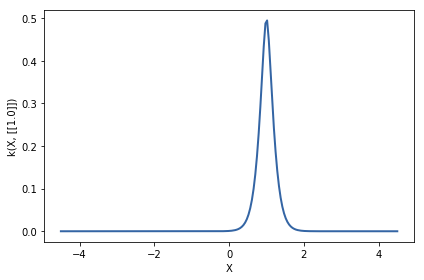

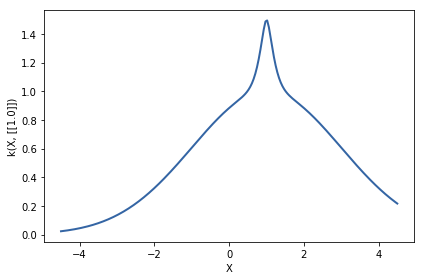

In [0]:
# Product of kernels
k1 = GPy.kern.RBF(1,1.,2.)
k2 = GPy.kern.Matern32(1, 0.5, 0.2)
k_prod = k1 *k2
print (k_prod)
k_prod.plot()



# Sum of kernels
k1 = GPy.kern.RBF(1,1.,2.)
k2 = GPy.kern.Matern32(1, 0.5, 0.2)
k_add = k1 + k2
print (k_add)
k_add.plot()

In [0]:
print (k1, '\n')
k_add.rbf.variance = 12.
print (k1)

  rbf.         |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    2.0  |      +ve      |         

  rbf.         |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    2.0  |      +ve      |        


 /usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'covariance': [<matplotlib.contour.QuadContourSet at 0x7fb9ada5ee10>]}

 /usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


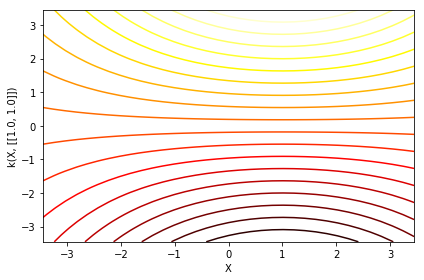

In [0]:
k1 = GPy.kern.Linear(input_dim=1, active_dims=[0]) # works on the first column of X, index=0
k2 = GPy.kern.ExpQuad(input_dim=1, lengthscale=3, active_dims=[1]) # works on the second column of X, index=1
k = k1 * k2
k.plot(x=np.ones((1,2)))

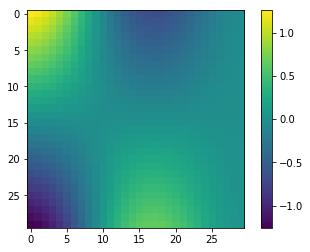

In [0]:
def plot_sample(k):
    xx, yy = np.mgrid[-3:3:30j, -3:3:30j]
    X = np.vstack((xx.flatten(), yy.flatten())).T
    K = k.K(X)
    s = np.random.multivariate_normal(np.zeros(X.shape[0]), K)
    #plt.contourf(xx, yy, s.reshape(*xx.shape), cmap=plt.cm.hot)
    plt.imshow(s.reshape(*xx.shape), interpolation='nearest')
    plt.colorbar()
plot_sample(k)

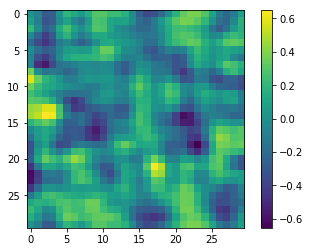

In [0]:
k1 = GPy.kern.PeriodicExponential(input_dim=1, active_dims=[0], period=6, lower=-10, upper=10)# + GPy.kern.Bias(1, variance=0, active_dims=[0])
k2 = GPy.kern.PeriodicExponential(input_dim=1, active_dims=[1], period=8, lower=-10, upper=10)# + GPy.kern.Bias(1, variance=0, active_dims=[0])

#k2 = GPy.kern.ExpQuad(1, active_dims=[1])
k = k1 * k2
plot_sample(k)

==================================================================================

In [0]:
train_df = pd.read_csv('https://gitlab.com/vsambhe1/machine-learning-competition/raw/master/train.csv')


,Id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,Category
0,120,0.147298,-0.142030,0.091737,-0.151707,0.060124,0.186191,-0.021298,-0.025636,0.061044,-0.032940,0.181828,0.019219,-0.032017,-0.054029,-0.093295,-0.062775,-0.035067,-0.048764,-0.065818,0.209884,-0.103010,0.014663,0.059252,0.063011,-0.005861,-0.024070,0.045155,0.026652,-0.025896,-0.156188,-0.046792,-0.114655,-0.066716,0.003322,0.035874,0.178045,-0.053741,0.077463,0.030596,...,-0.051111,-0.363520,0.209210,0.055056,-0.076735,-0.112466,-0.049565,0.071688,-0.189208,-0.014158,0.177064,-0.113395,0.008039,0.220331,0.063215,0.012592,0.050664,-0.040087,0.129963,-0.039933,-0.195918,-0.039130,-0.096673,-0.028119,-0.025908,0.119742,0.069529,0.026327,-0.000295,-0.105886,-0.218118,0.011316,0.079464,-0.010833,-0.053485,0.046450,-0.008333,0.168574,0.123273,0
1,121,0.115710,0.105061,0.038446,0.166711,-0.113913,0.004528,-0.006954,-0.140054,0.154231,-0.150152,-0.091541,0.040798,-0.000882,-0.189423,-0.020635,-0.066971,0.133756,-0.059153,-0.110073,-0.174534,-0.153030,-0.148063,0.087110,-0.030910,0.042293,0.156183,-0.212271,0.169429,0.063545,0.115878,0.001285,0.017324,0.147077,0.338460,0.198524,0.219389,0.064925,0.012353,-0.020075,...,-0.066628,-0.010276,-0.002572,0.097139,0.204940,0.065201,-0.127060,0.073919,0.068506,0.049881,-0.004740,0.063285,0.030190,0.002275,0.027033,-0.075690,-0.098659,0.072526,-0.022670,-0.006189,0.026661,-0.046953,-0.006708,-0.253884,-0.068468,-0.096877,0.102282,0.042765,-0.095751,0.023048,0.021526,0.069009,-0.060343,0.094007,0.049558,0.112370,0.020398,0.039687,0.217384,0
2,122,-0.548826,-0.466551,-0.650890,-0.553450,-0.449101,-0.496902,-0.464860,-0.394458,-0.271801,-0.349482,-0.187094,-0.375930,-0.384420,-0.052084,-0.299203,-0.357346,-0.398493,-0.120857,-0.272999,-0.280711,-0.292155,-0.197570,-0.337605,-0.100293,-0.327176,-0.228796,-0.236946,-0.293044,-0.312339,-0.180732,-0.123022,-0.194350,-0.088549,0.044384,0.147797,0.041080,0.152591,-0.089055,0.049464,...,0.228661,0.059073,0.128650,0.021256,0.183462,0.256512,0.070785,-0.080579,-0.035184,0.048901,0.067367,0.092570,0.069757,0.025446,-0.037862,0.066882,0.213277,0.130781,0.083268,0.133765,-0.005288,-0.017998,-0.040940,0.022320,-0.006342,0.157696,-0.009654,-0.041383,0.234157,-0.004228,0.057272,0.088062,-0.069730,0.168498,0.109672,0.202808,-0.019942,0.058902,0.053936,0
3,123,0.192618,0.291155,-0.042980,0.146483,0.015390,0.019394,-0.005577,-0.048682,0.025772,-0.079145,0.014541,-0.032802,-0.065138,-0.143099,-0.118278,0.009893,-0.017132,-0.162959,-0.049652,0.024639,-0.205142,0.031274,-0.071818,0.070818,-0.042073,-0.125225,-0.086653,0.100895,0.140544,0.040528,0.208591,-0.010689,0.156231,0.045565,0.101696,0.168284,0.070811,0.108665,0.235403,...,0.388778,0.284738,0.178796,0.342251,0.188698,0.029521,0.132738,0.043131,0.188368,0.215629,0.369084,0.219689,0.149141,0.237194,-0.083830,0.144390,0.182642,-0.055769,0.195366,0.106582,0.026158,0.129388,0.295199,0.091934,0.107656,0.049196,0.025287,0.210811,0.061483,0.174743,0.140831,0.257332,0.262786,0.351659,0.213291,0.251077,0.190920,0.251743,0.337730,1
4,124,0.075706,0.069045,-0.019818,0.068801,-0.226501,0.011658,0.087905,-0.080787,-0.080369,-0.182513,0.164091,-0.065843,0.031451,0.069013,0.161206,-0.003911,-0.040883,0.032050,0.144937,0.001399,-0.075081,-0.131578,-0.097438,0.113426,-0.002678,-0.028868,-0.037110,0.045695,0.016050,0.015591,0.180846,0.202827,-0.108763,0.088315,-0.018713,0.037669,0.097044,0.048568,0.096712,...,0.408251,0.099536,0.186293,0.234779,0.186673,0.193219,0.271190,0.388516,0.319634,0.397826,0.152506,0.296199,0.287385,0.314468,0.424584,0.272585,0.261919,0.363775,0.140566,0.302812,0.321291,0.250990,0.457150,0.253739,0.354998,0.406624,0.521479,0.394006,0.497707,0.483283,0.434803,0.322841,0.297772,0.461421,0.406143,0.562082,0.554588,0.471489,0.384229,1
5,125,1.081769,0.986722,1.067524,

In [0]:
def run_model(X,Y,plot=False):    
    
    with pm.Model() as model:
        
       
        η_true  = pm.HalfCauchy("η_true", beta=5, testval=1.0)
        
        #ExpQuad
        ℓ_true  = pm.Gamma("ℓ_true", alpha=1, beta=1 )
        cov_seasonal = η_true**2 * pm.gp.cov.ExpQuad(1, ℓ_true)    
        

        #  linear component x 
        tau = pm.HalfCauchy("tau", beta=2, testval=1.0)
        c  = pm.Normal("c", mu=0, sigma=1) 
        cov_linear = tau * pm.gp.cov.Linear(1, c)  
        gp1 = pm.gp.Marginal(cov_func=cov_linear)
        
        #Matern32
        η_per = pm.HalfCauchy("η_per", beta=5, testval=1.0)
        cov_mattern = η_per**2 * pm.gp.cov.Matern32(1, ℓ_true)
        #gp2 = pm.gp.Marginal(cov_func=cov_mattern)
        
#         periodic component
        period  = pm.Normal("period", mu=1, sigma=3)
        ℓ_psmooth = pm.Gamma("ℓ_psmooth ", alpha=1, beta=1)
        cov_periodic = η_per**2 * pm.gp.cov.Periodic(1, period, ℓ_psmooth)
        #gp3 = pm.gp.Marginal(cov_func=cov_periodic)
        
        gp2 = pm.gp.Marginal(cov_func=cov_mattern*cov_periodic)

        gp = gp1 + gp2 

        # noise model
        sigma = pm.HalfCauchy("sigma", beta=5, testval=0.1)
        f = gp.marginal_likelihood("f", X, Y[:,0], noise=sigma)

        # this line calls an optimizer to optimize the marginal likelihood
        mp = pm.find_MAP(include_transformed=True)
        #we can do  an approximated inference
#     with model:
#         inference = pm.ADVI()
#         approx = pm.fit(60000, method=inference)
        
#     posterior = approx.sample(draws=500)
    
#     all_prediction = np.dot(H,posterior['weights'].T).T
#     non_periodic_prediction = np.dot(H_np,posterior['weights'][:,0:col_per].T).T
    X_new = np.linspace(0, 1, 100)[:,None]

    #generic term
    f1_pred = gp1.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma})
    y1_pred = gp1.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma}, pred_noise=True)
    #linear term
    f2_pred = gp2.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma})
    y2_pred = gp2.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma}, pred_noise=True)
    #peridoic term
    #f3_pred = gp3.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma})
    #y3_pred = gp3.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma}, pred_noise=True)

    #sum of periodic and linear term
    y_pred  = gp.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma}, pred_noise=True)
    f_pred  = gp.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma})

    if plot==True:
        plt.figure()
        plt.plot(x,np.mean(f_pred,axis=0),'r', label='Overall Mean')
        plt.plot(x,np.mean(f2_pred,axis=0),'b', label='Mean of the non-periodic comp.')
        plt.legend()
        plt.scatter(X,Y)
#     Gradients = []
#     for i in range(f2_pred[0].shape[0]):
#         Gradients.append(np.min(np.gradient(f2_pred[1][i,:], X_new[:,0])))
    
#     posterior_probability_deriviative_is_positive = np.min(np.gradient(f2_pred[0], X_new[:,0]))
    posterior_probability_deriviative_is_positive = len(np.where(np.gradient(f2_pred[0],X_new[:,0])>0)[0])/len(f2_pred[0])
    print("probability that the function is increasing =", posterior_probability_deriviative_is_positive)
    if posterior_probability_deriviative_is_positive>=0.8:
        return (1, posterior_probability_deriviative_is_positive)
    else:
        return (0, posterior_probability_deriviative_is_positive)


In [0]:
x = np.linspace(0,1,100)[:,None]
Decision = pd.DataFrame(columns=['Id','Category', 'Prob'])
# train_df.shape[0]
for r in range(test_df.shape[0]):
    id_row = test_df.iloc[r,0]
    y = test_df.iloc[r,1:101].values[:,None]
    decision, prob = run_model(x,y)
#     Decision = Decision.append({'Id': int(id_row), 'Category': int(decision), 'Prob': prob}, ignore_index=True) 
    Decision = Decision.append({'Id': int(id_row), 'Category': int(decision)}, ignore_index=True)



 /usr/local/lib/python3.6/dist-packages/theano/tensor/basic.py:6611: FutureWarning:Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
 /usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning:find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
logp = 73.291, ||grad|| = 0.0033944: 100%|██████████| 42/42 [00:00<00:00, 97.21it/s]  


probability that the function is increasing = 0.49


logp = 74.977, ||grad|| = 0.13483: 100%|██████████| 99/99 [00:01<00:00, 86.92it/s]  


probability that the function is increasing = 0.51


logp = 65.073, ||grad|| = 0.021638: 100%|██████████| 87/87 [00:00<00:00, 109.07it/s] 


probability that the function is increasing = 0.31


logp = 72.911, ||grad|| = 0.036313: 100%|██████████| 119/119 [00:01<00:00, 117.51it/s] 


probability that the function is increasing = 0.54


logp = 75.128, ||grad|| = 0.0032033: 100%|██████████| 84/84 [00:00<00:00, 85.37it/s]  


probability that the function is increasing = 0.55


logp = 63.804, ||grad|| = 0.0051653: 100%|██████████| 42/42 [00:00<00:00, 102.03it/s]  


probability that the function is increasing = 0.49


logp = 56.773, ||grad|| = 0.0074831: 100%|██████████| 84/84 [00:01<00:00, 79.20it/s]  


probability that the function is increasing = 0.51


logp = 58.543, ||grad|| = 0.016385: 100%|██████████| 65/65 [00:00<00:00, 112.65it/s]  


probability that the function is increasing = 0.52


logp = 57.935, ||grad|| = 0.0022033: 100%|██████████| 72/72 [00:00<00:00, 95.50it/s]  


probability that the function is increasing = 0.45


In [0]:
output_file = Decision.to_csv('submission_1.csv')

from google.colab import files	
files.download(output_file)

======================================================================================

In [0]:
data = pd.read_csv('https://gitlab.com/vsambhe1/machine-learning-competition/raw/master/train.csv')
data.head(10)

,Id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,Category
0,120,0.147298,-0.142030,0.091737,-0.151707,0.060124,0.186191,-0.021298,-0.025636,0.061044,-0.032940,0.181828,0.019219,-0.032017,-0.054029,-0.093295,-0.062775,-0.035067,-0.048764,-0.065818,0.209884,-0.103010,0.014663,0.059252,0.063011,-0.005861,-0.024070,0.045155,0.026652,-0.025896,-0.156188,-0.046792,-0.114655,-0.066716,0.003322,0.035874,0.178045,-0.053741,0.077463,0.030596,...,-0.051111,-0.363520,0.209210,0.055056,-0.076735,-0.112466,-0.049565,0.071688,-0.189208,-0.014158,0.177064,-0.113395,0.008039,0.220331,0.063215,0.012592,0.050664,-0.040087,0.129963,-0.039933,-0.195918,-0.039130,-0.096673,-0.028119,-0.025908,0.119742,0.069529,0.026327,-0.000295,-0.105886,-0.218118,0.011316,0.079464,-0.010833,-0.053485,0.046450,-0.008333,0.168574,0.123273,0
1,121,0.115710,0.105061,0.038446,0.166711,-0.113913,0.004528,-0.006954,-0.140054,0.154231,-0.150152,-0.091541,0.040798,-0.000882,-0.189423,-0.020635,-0.066971,0.133756,-0.059153,-0.110073,-0.174534,-0.153030,-0.148063,0.087110,-0.030910,0.042293,0.156183,-0.212271,0.169429,0.063545,0.115878,0.001285,0.017324,0.147077,0.338460,0.198524,0.219389,0.064925,0.012353,-0.020075,...,-0.066628,-0.010276,-0.002572,0.097139,0.204940,0.065201,-0.127060,0.073919,0.068506,0.049881,-0.004740,0.063285,0.030190,0.002275,0.027033,-0.075690,-0.098659,0.072526,-0.022670,-0.006189,0.026661,-0.046953,-0.006708,-0.253884,-0.068468,-0.096877,0.102282,0.042765,-0.095751,0.023048,0.021526,0.069009,-0.060343,0.094007,0.049558,0.112370,0.020398,0.039687,0.217384,0
2,122,-0.548826,-0.466551,-0.650890,-0.553450,-0.449101,-0.496902,-0.464860,-0.394458,-0.271801,-0.349482,-0.187094,-0.375930,-0.384420,-0.052084,-0.299203,-0.357346,-0.398493,-0.120857,-0.272999,-0.280711,-0.292155,-0.197570,-0.337605,-0.100293,-0.327176,-0.228796,-0.236946,-0.293044,-0.312339,-0.180732,-0.123022,-0.194350,-0.088549,0.044384,0.147797,0.041080,0.152591,-0.089055,0.049464,...,0.228661,0.059073,0.128650,0.021256,0.183462,0.256512,0.070785,-0.080579,-0.035184,0.048901,0.067367,0.092570,0.069757,0.025446,-0.037862,0.066882,0.213277,0.130781,0.083268,0.133765,-0.005288,-0.017998,-0.040940,0.022320,-0.006342,0.157696,-0.009654,-0.041383,0.234157,-0.004228,0.057272,0.088062,-0.069730,0.168498,0.109672,0.202808,-0.019942,0.058902,0.053936,0
3,123,0.192618,0.291155,-0.042980,0.146483,0.015390,0.019394,-0.005577,-0.048682,0.025772,-0.079145,0.014541,-0.032802,-0.065138,-0.143099,-0.118278,0.009893,-0.017132,-0.162959,-0.049652,0.024639,-0.205142,0.031274,-0.071818,0.070818,-0.042073,-0.125225,-0.086653,0.100895,0.140544,0.040528,0.208591,-0.010689,0.156231,0.045565,0.101696,0.168284,0.070811,0.108665,0.235403,...,0.388778,0.284738,0.178796,0.342251,0.188698,0.029521,0.132738,0.043131,0.188368,0.215629,0.369084,0.219689,0.149141,0.237194,-0.083830,0.144390,0.182642,-0.055769,0.195366,0.106582,0.026158,0.129388,0.295199,0.091934,0.107656,0.049196,0.025287,0.210811,0.061483,0.174743,0.140831,0.257332,0.262786,0.351659,0.213291,0.251077,0.190920,0.251743,0.337730,1
4,124,0.075706,0.069045,-0.019818,0.068801,-0.226501,0.011658,0.087905,-0.080787,-0.080369,-0.182513,0.164091,-0.065843,0.031451,0.069013,0.161206,-0.003911,-0.040883,0.032050,0.144937,0.001399,-0.075081,-0.131578,-0.097438,0.113426,-0.002678,-0.028868,-0.037110,0.045695,0.016050,0.015591,0.180846,0.202827,-0.108763,0.088315,-0.018713,0.037669,0.097044,0.048568,0.096712,...,0.408251,0.099536,0.186293,0.234779,0.186673,0.193219,0.271190,0.388516,0.319634,0.397826,0.152506,0.296199,0.287385,0.314468,0.424584,0.272585,0.261919,0.363775,0.140566,0.302812,0.321291,0.250990,0.457150,0.253739,0.354998,0.406624,0.521479,0.394006,0.497707,0.483283,0.434803,0.322841,0.297772,0.461421,0.406143,0.562082,0.554588,0.471489,0.384229,1
5,125,1.081769,0.986722,1.067524,

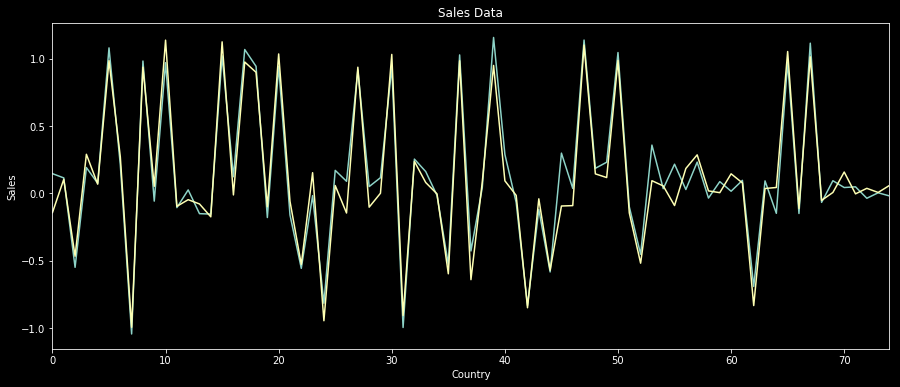

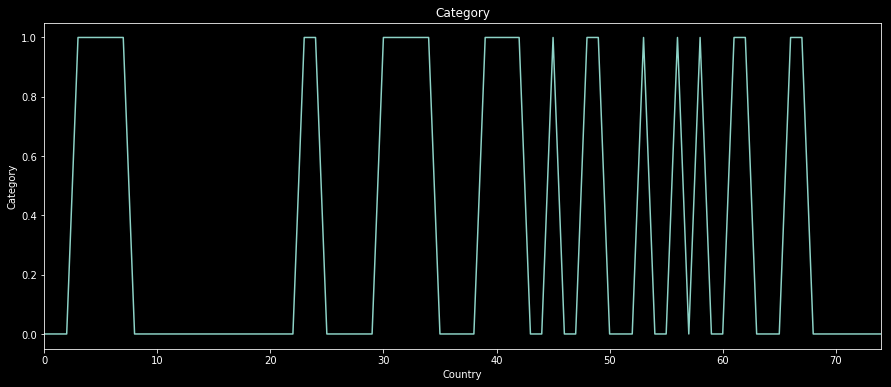

In [0]:
ax = data.iloc[:,1:3 ].plot(figsize = (15,6), title="Sales Data", legend = False)
ax.set(xlabel="Country", ylabel="Sales")
ax = data.iloc[:,101:102 ].plot(figsize = (15,6), title="Category", legend = False)
ax.set(xlabel="Country", ylabel="Category")
plt.style.use('dark_background')

plt.show()

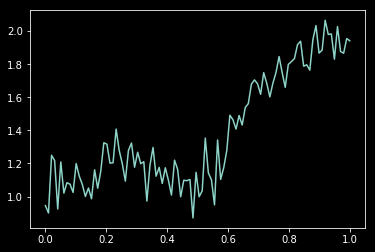

In [0]:
X = np.linspace(0,1,100)
Y = data.iloc[18,1:101].values
X = X[:, None]
Y = Y[:, None]
plt.plot(X,Y)

In [0]:
import pymc3 as pm

with pm.Model() as model:
    #  periodic component x 
    η_true  = pm.Normal("η_true", mu=0.1, sigma=3)
    ℓ_true  = pm.Normal("ℓ_true", mu=0.1, sigma=3)

    cov_seasonal = η_true**2 * pm.gp.cov.ExpQuad(1, ℓ_true) # Maybe change this to 100 since its 100 dimentions
    gp1 = pm.gp.Marginal(cov_func=cov_seasonal)

    #  linear component x 
    cov_linear = η_true**2 * pm.gp.cov.Matern32(1, ℓ_true) # Maybe change this to 100 since its 100 dimentions
    gp2 = pm.gp.Marginal(cov_func=cov_linear)

    # gp represents f1 + f2.
    gp = gp1 + gp2

    # noise model
    sigma = pm.HalfCauchy("sigma", beta=5, testval=0.1)
    f = gp.marginal_likelihood("f", X, Y[:,0], noise=sigma)

    # this line calls an optimizer to optimize the marginal likelihood
    mp = pm.find_MAP(include_transformed=True)

 /usr/local/lib/python3.6/dist-packages/theano/tensor/basic.py:6611: FutureWarning:Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
 /usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning:find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
logp = 66.555, ||grad|| = 0.03297: 100%|██████████| 18/18 [00:00<00:00, 92.67it/s]  


In [0]:
 #optimized parameters
sorted([name+":"+str(mp[name]) for name in mp.keys() if not name.endswith("_")])

['sigma:0.09646366589418474',
 'η_true:0.9217250135050253',
 'ℓ_true:0.7831299949377576']

 /usr/local/lib/python3.6/dist-packages/theano/tensor/basic.py:6611: FutureWarning:Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


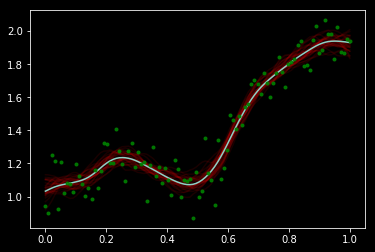

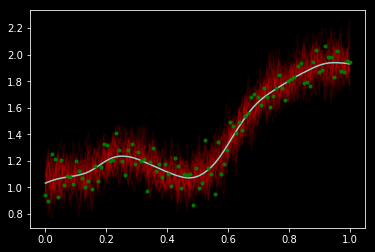

In [0]:
# 200 new values from x=0 to x=3
n_new = 100
X_new = np.linspace(0, 1, n_new)[:,None]

#periodic term
f1_pred = gp1.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma})
y1_pred = gp1.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma}, pred_noise=True)
#linear term
f2_pred = gp2.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma})
y2_pred = gp2.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma}, pred_noise=True)
#sum of periodic and linear term
y_pred  = gp.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma}, pred_noise=True)
f_pred  = gp.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma})

#we sample 10 regression lines from the posterior
sample_f = multivariate_normal(f_pred[0],f_pred[1]).rvs(30)

plt.plot(X_new[:,0],sample_f.T,color='red',alpha=0.1)# regression lines
plt.plot(X_new[:,0],f_pred[0])# this is the average line
plt.plot(X, Y, 'og', ms=3, alpha=0.9, label="Observed data", Zorder=1000);
plt.show()

#we sample 10 regression lines from the posterior
sample_y = multivariate_normal(y_pred[0],y_pred[1]).rvs(30)

plt.plot(X_new[:,0],sample_y.T,color='red',alpha=0.1)# regression lines
plt.plot(X_new[:,0],f_pred[0])# this is the average line
plt.plot(X, Y, 'og', ms=3, alpha=0.9, label="Observed data", Zorder=1000);
plt.show()

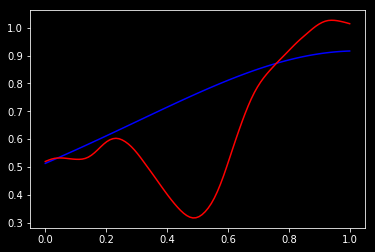

In [0]:
#we can recover the single components
plt.plot(X_new[:,0],f1_pred[0], color="blue")
plt.plot(X_new[:,0],f2_pred[0], color="red")

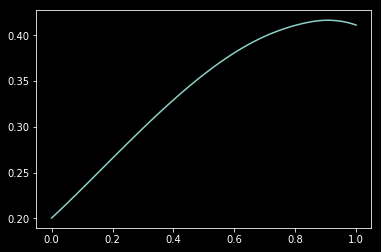

In [0]:
plt.plot(X_new[:,0],f2_pred[1][88])

In [0]:
def run_model(x_in, y_in, plot=False):
    with pm.Model() as model:
        #  periodic component x 
        η_true  = pm.Normal("η_true", mu=0.1, sigma=3)
        ℓ_true  = pm.Normal("ℓ_true", mu=0.1, sigma=3)

        cov_seasonal = η_true**2 * pm.gp.cov.ExpQuad(1, ℓ_true) # Maybe change this to 100 since its 100 dimentions
        gp1 = pm.gp.Marginal(cov_func=cov_seasonal)

        #  linear component x 
        cov_linear = η_true**2 * pm.gp.cov.Matern32(1, ℓ_true) # Maybe change this to 100 since its 100 dimentions
        gp2 = pm.gp.Marginal(cov_func=cov_linear)

        # gp represents f1 + f2.
        gp = gp1 + gp2

        # noise model
        sigma = pm.HalfCauchy("sigma", beta=5, testval=0.1)
        f = gp.marginal_likelihood("f", x_in, y_in[:,0], noise=sigma)

        # this line calls an optimizer to optimize the marginal likelihood
        mp = pm.find_MAP(include_transformed=True)

    # 200 new values from x=0 to x=3
    n_new = 100
    X_new = np.linspace(0, 1, n_new)[:,None]

    #periodic term
    f1_pred = gp1.predict(X_new, point=mp, given={"gp": gp, "X": x_in, "y": y_in[:,0], "noise": sigma})
    y1_pred = gp1.predict(X_new, point=mp, given={"gp": gp, "X": x_in, "y": y_in[:,0], "noise": sigma}, pred_noise=True)
    #linear term
    f2_pred = gp2.predict(X_new, point=mp, given={"gp": gp, "X": x_in, "y": y_in[:,0], "noise": sigma})
    y2_pred = gp2.predict(X_new, point=mp, given={"gp": gp, "X": x_in, "y": y_in[:,0], "noise": sigma}, pred_noise=True)
    #sum of periodic and linear term
    y_pred  = gp.predict(X_new, point=mp, given={"gp": gp, "X": x_in, "y": y_in[:,0], "noise": sigma}, pred_noise=True)
    f_pred  = gp.predict(X_new, point=mp, given={"gp": gp, "X": x_in, "y": y_in[:,0], "noise": sigma})
    
    posterior_probability_deriviative_is_positive = len(np.where(np.gradient(f2_pred[0],X_new[:,0])>0)[0])/len(f2_pred[0])
    
    print("Probability Sales Increasing is: ", posterior_probability_deriviative_is_positive)
    if posterior_probability_deriviative_is_positive>0.8:
        return 1
    else:
        return 0

In [0]:
test_df = pd.read_csv('https://gitlab.com/vsambhe1/machine-learning-competition/raw/master/test.csv')

test_df.head()

,Id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0,1.050702,1.004361,0.880657,0.959512,1.014129,0.890916,0.986703,1.135940,1.223539,1.048966,1.176659,0.919705,1.187157,1.050918,1.172149,1.126740,1.293658,1.084274,1.244579,1.163968,1.186190,1.193736,1.137655,1.230913,1.236159,1.276649,1.271077,1.352527,1.375179,1.187867,1.389908,1.194498,1.382018,1.395307,1.152303,1.362833,1.316787,1.297861,1.518924,...,1.558481,1.533550,1.557561,1.501308,1.638878,1.488099,1.685758,1.673135,1.701562,1.644757,2.014757,1.853183,1.602818,1.760661,1.686674,1.656128,1.633670,1.820999,1.719741,1.894762,1.907459,1.955573,1.743044,1.885920,1.911730,1.811168,1.791510,2.039740,1.911638,1.962587,1.826883,1.797263,1.872348,1.926992,1.843073,1.958611,1.800846,1.867793,2.056990,2.060379
1,1,-0.042360,-0.134542,-0.093373,0.076402,-0.122659,-0.149690,-0.050888,0.087327,-0.003546,-0.028300,0.024603,-0.152401,0.073636,0.064494,-0.012809,0.130665,-0.080753,0.146677,0.051180,0.003860,0.037237,0.030111,0.164362,-0.063984,-0.031392,0.149457,-0.013005,0.137041,0.217050,0.006687,0.114370,-0.070190,0.119155,0.061674,0.086634,-0.028062,-0.132846,0.080010,-0.180505,...,0.094971,-0.010161,0.107850,0.207356,0.035418,0.311750,0.055835,0.117630,0.052678,0.147349,-0.044528,0.079371,0.028685,0.155032,0.244261,0.212491,-0.086411,0.357652,0.185517,0.080766,0.176460,0.180622,0.098515,0.187142,0.108719,0.131120,0.104998,0.032414,0.192309,0.238293,0.233283,0.265816,0.218283,0.134600,0.273861,0.056165,0.103871,0.099539,0.305985,0.294278
2,2,0.035063,0.050938,0.067512,0.117029,0.049060,-0.014029,0.079372,0.204120,0.002883,-0.079294,0.130875,0.010132,-0.193101,0.110893,-0.025411,0.021019,0.065195,0.052937,0.106676,-0.006034,0.090535,0.014883,0.116215,0.105221,-0.048684,0.154425,-0.007048,0.127794,0.083835,0.230685,0.023887,0.010247,0.041740,0.011413,0.119324,-0.125136,-0.072106,-0.077096,0.120866,...,0.228227,0.146513,0.087733,-0.072389,0.070475,0.017632,0.325492,0.096800,0.132247,0.180170,0.134055,0.303480,0.075632,0.160959,0.070569,0.015888,0.089578,0.149741,0.113059,0.089174,0.020116,0.154693,0.014728,0.243356,0.177710,0.025801,0.142705,0.100465,0.209643,0.313808,-0.005722,0.195326,0.169835,0.255006,0.211215,0.116720,0.162032,0.116356,0.305580,0.202131
3,3,-0.111408,-0.063093,-0.094206,-0.054800,-0.021415,0.083715,-0.032116,-0.158563,0.114007,-0.083709,-0.005872,0.044654,0.019961,0.109418,0.047900,-0.086131,0.217856,0.019433,-0.014734,0.096393,0.024945,0.039923,0.249218,-0.027512,-0.031776,0.011658,0.107152,-0.150653,-0.196556,-0.058712,-0.163392,-0.042483,0.050250,-0.089075,-0.142683,0.006934,0.086254,-0.169497,0.082023,...,0.004933,0.072245,-0.036528,0.238797,0.018007,-0.027293,-0.083569,0.109722,0.086719,-0.049735,0.057645,-0.150856,0.018497,0.045276,0.170733,-0.077082,-0.127835,-0.089543,-0.133657,0.133666,0.154864,0.032022,0.122129,0.013396,-0.009511,-0.033304,-0.031039,-0.154780,0.026425,-0.004033,0.074536,0.009352,-0.016270,-0.087119,0.007215,0.073824,-0.114334,0.008747,0.023304,-0.071806
4,4,0.977574,0.989015,1.243740,1.111227,1.288457,1.000790,1.052081,0.937450,0.999783,1.280996,1.048649,1.302805,0.996531,1.025463,1.106565,1.144102,1.252457,1.214738,1.137337,1.174678,1.164804,1.113517,1.123927,1.322599,1.043294,1.393208,1.201432,1.161468,1.314238,1.388713,1.350117,1.284804,1.337579,1.049475,1.159145,1.108464,1.308507,1.132607,1.239184,...,1.457998,1.314797,1.336388,1.384295,1.487266,1.582457,1.621445,1.488029,1.509391,1.540630,1.643197,1.653590,1.598247,1.737439,1.952678,1.690791,1.711813,1.824245,1.724858,1.859566,1.732316,1.998544,1.860704,1.774913,1.788578,1.806480,2.005459,1.751568,1.821861,1.842667,1.907418,1.892012,1.780125,1.899383,1.939521,1.896775,2.038367,2.071734,1.982058,2.023052


In [0]:
x = np.linspace(0,1,100)[:,None]
Decision = pd.DataFrame(columns=['Id','Category'])
for r in range(test_df.shape[0]):
    id_row = test_df.iloc[r,0]
    y = test_df.iloc[r,1:101].values[:,None]
    decision = run_model(x,y)
    Decision = Decision.append({'Id': int(id_row), 'Category': int(decision)}, ignore_index=True) 
    
print(Decision)
#Decision.to_csv('submission_1.csv')

NameError: ignored

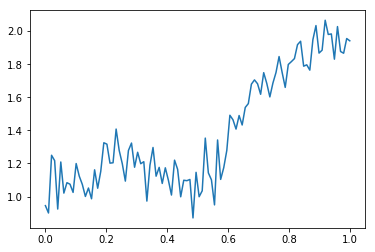

In [0]:
X = np.linspace(0,1,100)
Y = data.iloc[18,1:101].values
X = X[:, None]
Y = Y[:, None]
plt.plot(X,Y)

Optimization restart 1/5, f = -73.93466762374985


 /usr/local/lib/python3.6/dist-packages/GPy/kern/src/periodic.py:100: RuntimeWarning:overflow encountered in multiply
 /usr/local/lib/python3.6/dist-packages/GPy/kern/src/periodic.py:100: RuntimeWarning:overflow encountered in true_divide
 /usr/local/lib/python3.6/dist-packages/GPy/kern/src/periodic.py:86: RuntimeWarning:overflow encountered in true_divide
 /usr/local/lib/python3.6/dist-packages/GPy/kern/src/periodic.py:40: RuntimeWarning:invalid value encountered in multiply
 /usr/local/lib/python3.6/dist-packages/GPy/kern/src/periodic.py:40: RuntimeWarning:invalid value encountered in cos


Optimization restart 2/5, f = -73.59105386796338
Optimization restart 3/5, f = -73.59105440073671
Optimization restart 4/5, f = -72.08646423274567
Optimization restart 5/5, f = -44.494775270411914


GP_regression.,value,constraints,priors
sum.mlp.variance,0.012425812454756031,+ve,
sum.mlp.weight_variance,0.004283646476015144,+ve,
sum.mlp.bias_variance,1.071022408564447,+ve,
sum.periodic_exponential.variance,0.198259613160313,+ve,
sum.periodic_exponential.lengthscale,0.2539712689905575,+ve,
sum.periodic_exponential.period,3.491422172689706,+ve,
sum.poly.variance,0.6287246907291099,+ve,
sum.poly.scale,0.3865299036244534,+ve,
sum.poly.bias,1.2721772869782961,+ve,
Gaussian_noise.variance,0.009589188520517787,+ve,


 /usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


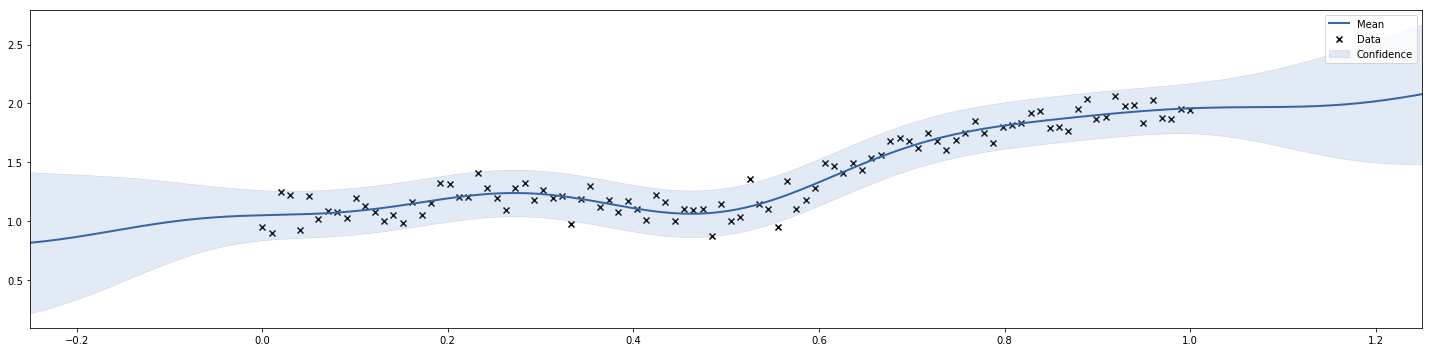

In [0]:
import GPy as GPy

# define kernel
#RBF
ker1 = GPy.kern.MLP(1,ARD=True) 
#Periodic
ker2 = GPy.kern.PeriodicExponential(1) 
#Polynomial of degree 2
ker3 = GPy.kern.Poly(1,order=2) 

# create a GP model
model = GPy.models.GPRegression(X,Y,kernel=ker1+ker2+ker3)

# it finds the optimal parameters of the RBF kernel by maxisiming the marginal likelihood 
model.optimize_restarts(5)# this maximise the marginal likelihood, with random restarts
#we  plot it
fig = model.plot(figsize=(20,5))
display(model)

In [0]:
X_test = X
X_test = X_test.reshape(-1,1)

In [0]:
X_test

In [0]:
f_pred, sigm2_pred = model.predict(X_test)

In [0]:
f_pred

Optimization restart 1/5, f = -73.92569350924575
Optimization restart 2/5, f = -75.42456514912999
Optimization restart 3/5, f = -72.8581377613896
Optimization restart 4/5, f = -74.34278031595261
Optimization restart 5/5, f = -72.9947630405849


GP_regression.,value,constraints,priors
sum.rbf.variance,0.048861060991017925,+ve,
sum.rbf.lengthscale,0.21300750606295651,+ve,
sum.periodic_exponential.variance,2.732625088785805,+ve,
sum.periodic_exponential.lengthscale,1.47000846047073,+ve,
sum.periodic_exponential.period,0.40878192310394645,+ve,
sum.poly.variance,1.9145741900536775,+ve,
sum.poly.scale,0.01672336863803719,+ve,
sum.poly.bias,0.7074051636665319,+ve,
sum.linear.variances,0.840260077935393,+ve,
sum.mlp.variance,0.0004457346301311017,+ve,


 /usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


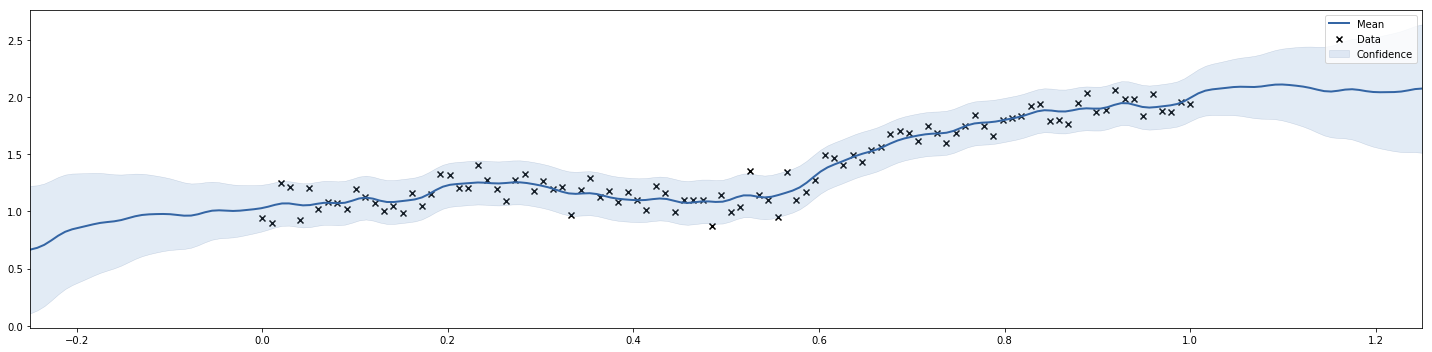

In [0]:
import GPy as GPy

# define kernel
#RBF
ker1 = GPy.kern.RBF(1,ARD=True) 
#Periodic
ker2 = GPy.kern.PeriodicExponential(1) 
#Polynomial of degree 2
ker3 = GPy.kern.Poly(1,order=2) 
ker4 = GPy.kern.Linear(1,ARD=True) 
ker5 = GPy.kern.MLP(1,ARD=True) 
# create a GP model
model = GPy.models.GPRegression(X,Y,kernel=ker1+ker2+ker3+ker4+ker5)

# it finds the optimal parameters of the RBF kernel by maxisiming the marginal likelihood 
model.optimize_restarts(5)# this maximise the marginal likelihood, with random restarts
#we  plot it
fig = model.plot(figsize=(20,5))
display(model)

In [0]:
f_pred, sigm2_pred = model.predict(X_test,kern=ker4)

In [0]:
posterior_probability_deriviative_is_positive = len(np.where(np.gradient(f_pred[:,0],X_test[:,0])>0)[0])/len(f_pred[:,0])
    
print("Probability Sales Increasing is: ", posterior_probability_deriviative_is_positive)
if posterior_probability_deriviative_is_positive>0.8:
    print(1)
else:
    print(0)

Probability Sales Increasing is:  0.71
0


In [0]:
np.linspace(0, 3, 5)[:,None]

array([[0.  ],
       [0.75],
       [1.5 ],
       [2.25],
       [3.  ]])

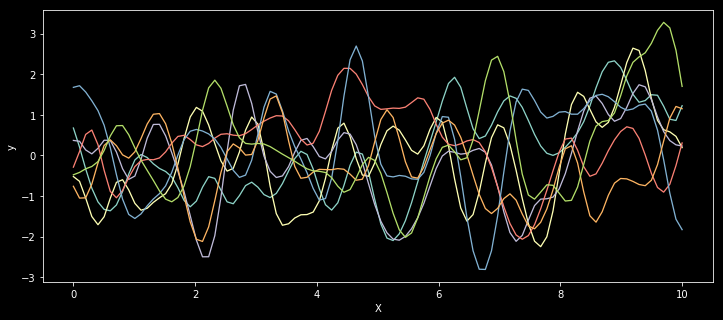

In [0]:
n = 100 # The number of data points
X = np.linspace(0, 10, n)[:, None] # The inputs to the GP, they must be arranged as a column vector

# Description 
ℓ_true = 0.3
η_true = 1.0
#cov_func = η_true**2 * pm.gp.cov.Matern52(1, ℓ_true)

cov_func = η_true**2 * pm.gp.cov.ExpQuad(1,    ℓ_true)

#cov_func = η_true**2 * pm.gp.cov.Periodic(1,  2, ℓ_true)

fig = plt.figure(figsize=(12,5)); ax = fig.gca()
for i in range(7):
    # The latent function values are one sample from a multivariate normal
    # Note that we have to call `eval()` because PyMC3 built on top of Theano
    f_true = np.random.multivariate_normal(np.zeros(len(X)),
                                           cov_func(X).eval() + 1e-8*np.eye(n), 1).flatten()

   
    ax.plot(X, f_true, lw=1.3, label="True f");
    ax.set_xlabel("X"); ax.set_ylabel("y"); #plt.legend();

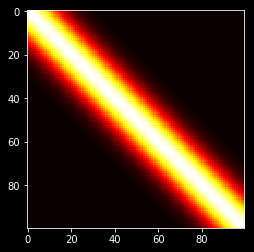

In [0]:
plt.imshow(cov_func(X).eval(), cmap='hot', interpolation='nearest')

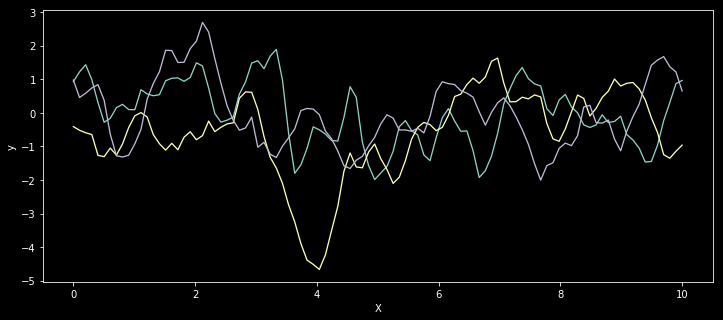

In [0]:
n = 100 # The number of data points
X = np.linspace(0, 10, n)[:, None] # The inputs to the GP, they must be arranged as a column vector

# Description 
ℓ_true = 0.4
η_true = 1.0
cov_func = η_true**2 * pm.gp.cov.Matern32(1, ℓ_true)



fig = plt.figure(figsize=(12,5)); ax = fig.gca()
for i in range(3):
    # The latent function values are one sample from a multivariate normal
    # Note that we have to call `eval()` because PyMC3 built on top of Theano
    f_true = np.random.multivariate_normal(np.zeros(len(X)),
                                           cov_func(X).eval() + 1e-8*np.eye(n), 1).flatten()

   
    ax.plot(X, f_true, lw=1.3, label="True f");
    ax.set_xlabel("X"); ax.set_ylabel("y"); #plt.legend();

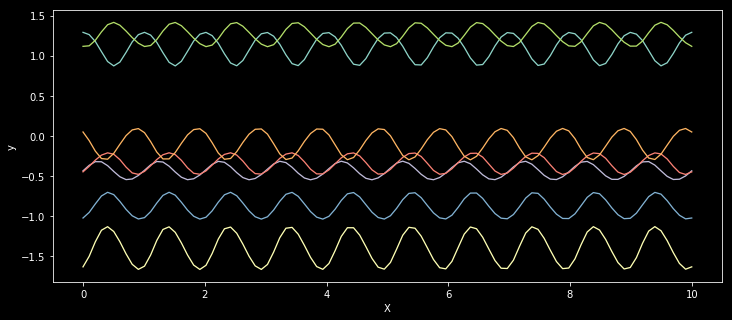

In [0]:
n = 100 # The number of data points
X = np.linspace(0, 10, n)[:, None] # The inputs to the GP, they must be arranged as a column vector

# Description 
ℓ_true = 4.0
η_true = 1.0
ℓ_psmooth

cov_func = η_true**2 * pm.gp.cov.Periodic(1,  1, ℓ_true)
#cov_func = η_true**2 * pm.gp.cov.Periodic(1,  period, ℓ_psmooth)

fig = plt.figure(figsize=(12,5)); ax = fig.gca()
for i in range(7):
    # The latent function values are one sample from a multivariate normal
    # Note that we have to call `eval()` because PyMC3 built on top of Theano
    f_true = np.random.multivariate_normal(np.zeros(len(X)),
                                           cov_func(X).eval() + 1e-8*np.eye(n), 1).flatten()

   
    ax.plot(X, f_true, lw=1.3, label="True f");
    ax.set_xlabel("X"); ax.set_ylabel("y"); #plt.legend();

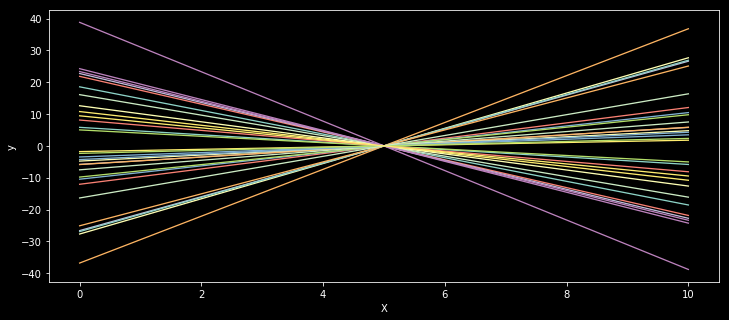

In [0]:
n = 100 # The number of data points
X = np.linspace(0, 10, n)[:, None] # The inputs to the GP, they must be arranged as a column vector

# Description 
c = 5.0 #intercept
tau = 10 #scaling



cov_func =  tau*pm.gp.cov.Linear(1,  c) 

fig = plt.figure(figsize=(12,5)); ax = fig.gca()
for i in range(30):
    # The latent function values are one sample from a multivariate normal
    # Note that we have to call `eval()` because PyMC3 built on top of Theano
    f_true = np.random.multivariate_normal(np.zeros(len(X)),
                                           cov_func(X).eval() + 1e-8*np.eye(n), 1).flatten()

   
    ax.plot(X, f_true, lw=1.3, label="True f");
    ax.set_xlabel("X"); ax.set_ylabel("y"); #plt.legend();